In [2]:
# Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'data.csv'
df = pd.read_csv(file_path)

# Drop the 'Unnamed: 32' column and 'id' column
df = df.drop(columns=['Unnamed: 32', 'id'])

# Encode the 'diagnosis' column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define a function to detect and remove outliers
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    df = df[~outliers.any(axis=1)]
    return df

# Remove outliers
df = remove_outliers(df)

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled dataframe
X_scaled.head(), y.head()


(   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0     1.964461      0.377377        1.973596   2.108920         0.112751   
 1     0.134540      0.594978        0.225722   0.033027         2.126689   
 2     1.065623      1.211941        0.968866   1.020884        -0.930314   
 3     0.968887     -0.157666        1.022372   0.945414         0.317713   
 4     0.997102      1.393701        1.028317   0.953051        -0.768502   
 
    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
 0          0.650915        1.066356             1.488638       0.277054   
 1          2.239566        0.677832             0.935739       2.210386   
 2         -0.560180       -0.560181            -0.104415      -1.002217   
 3          1.229127        0.797817             1.178389       0.507899   
 4          0.399021        0.794553             0.693088       0.531946   
 
    fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst 

In [4]:
# Feature Selection

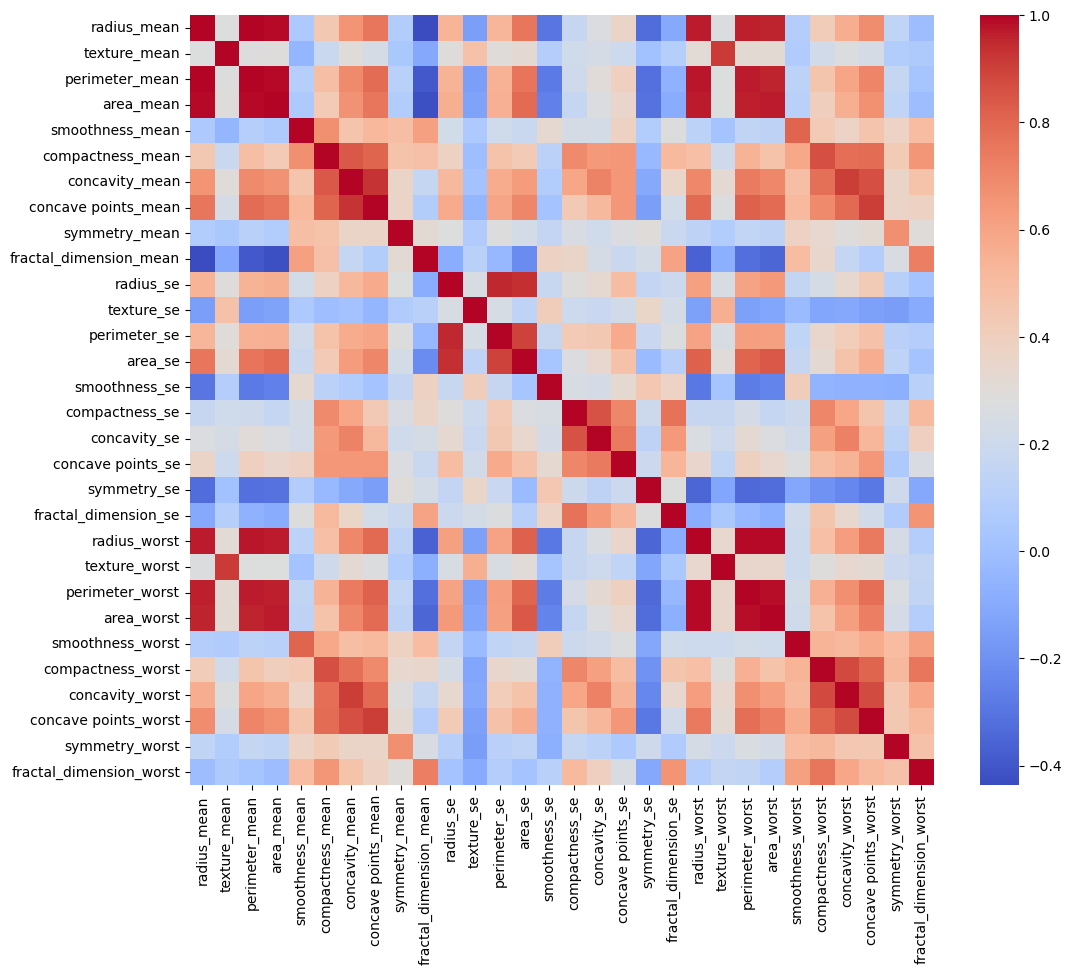

In [5]:
# Compute the correlation matrix
corr = X_scaled.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()


In [6]:
# Machine Learning Model (SVM)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(0.9375,
 array([[53,  2],
        [ 3, 22]]),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.95        55\n           1       0.92      0.88      0.90        25\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.92      0.93        80\nweighted avg       0.94      0.94      0.94        80\n')

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'data.csv'
df = pd.read_csv(file_path)

# Drop the 'Unnamed: 32' column and 'id' column
df = df.drop(columns=['Unnamed: 32', 'id'])

# Encode the 'diagnosis' column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define a function to detect and remove outliers
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    df = df[~outliers.any(axis=1)]
    return df

# Remove outliers
df = remove_outliers(df)

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.94
Confusion Matrix:
 [[53  2]
 [ 3 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.92      0.88      0.90        25

    accuracy                           0.94        80
   macro avg       0.93      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80

